## Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

## Data Analysis

In [4]:
iot_ds2=pd.read_csv('/content/drive/MyDrive/IoT-DS2 reducef.csv')
iot_ds2.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Bwd_IAT_Mean.1
0,6464560207,3232261269,37735,3232261123,80,6,1522984071,23851151,3,1,...,0.00000,0,0,7950383.667,2.039627e+06,9696096.0,5708424.0,Anomaly,DDoS,NaN
1,6464546196,3232261270,23723,3232261123,80,6,1522984067,25774071,5,2,...,0.00000,227263,227263,6998669.333,2.081267e+06,9384372.0,5554838.0,Anomaly,DDoS,NaN
2,6464574400,3232261269,51928,3232261123,80,6,1522984074,16249054,4,3,...,80741.69492,323645,209459,7857975.000,5.254086e+05,8229495.0,7486455.0,Anomaly,DDoS,NaN
3,6464568036,3232261267,45566,3232261123,80,17,1522987840,1374695,1,1,...,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,Anomaly,DDoS,NaN
4,6464563406,3232261269,40934,3232261123,80,6,1522984081,14172841,2,1,...,0.00000,0,0,7086420.500,2.093505e+06,8566752.0,5606089.0,Anomaly,DDoS,NaN


In [4]:
iot_ds2.describe()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Bwd_IAT_Mean.1
count,7.982650e+05,7.982650e+05,798265.000000,7.982650e+05,798265.000000,798265.000000,7.982650e+05,7.982650e+05,798265.000000,798265.000000,...,798265.000000,7.982650e+05,7.982650e+05,7.982650e+05,7.982650e+05,7.982650e+05,7.982650e+05,7.982650e+05,7.982650e+05,0.0
mean,5.921188e+09,2.950734e+09,35838.442120,2.970406e+09,12186.364604,7.591803,1.544006e+09,1.445034e+07,5.114522,2.551387,...,13.738686,3.140137e+05,2.830018e+04,3.349567e+05,2.941816e+05,5.706647e+14,3.159644e+13,5.833193e+14,5.041331e+14,NaN
std,1.095899e+09,8.729466e+08,21292.439571,7.441764e+08,19710.202205,3.902274,2.212502e+07,2.278591e+07,537.302059,4.898816,...,17.641240,1.443166e+06,3.026581e+05,1.492906e+06,1.427968e+06,7.412914e+14,1.389640e+14,7.559561e+14,7.297376e+14,NaN
min,2.688302e+08,2.998509e+07,0.000000,1.600000e+01,0.000000,0.000000,1.515370e+09,-1.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.741379e+09,3.232236e+09,15852.000000,3.232236e+09,80.000000,6.000000,1.522988e+09,1.830700e+04,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,6.464545e+09,3.232236e+09,41607.000000,3.232261e+09,80.000000,6.000000,1.545390e+09,7.175907e+06,4.000000,2.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.982626e+06,4.463746e+05,8.463399e+06,5.617631e+06,NaN
75%,6.464581e+09,3.232261e+09,53540.000000,3.232261e+09,11487.000000,6.000000,1.564025e+09,2.196092e+07,5.000000,3.000000,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+15,2.165317e+06,1.550000e+15,1.550000e+15,NaN
max,7.527256e+09,3.754172e+09,65535.000000,4.294967e+09,65535.000000,17.000000,1.626325e+09,1.200000e+08,339544.000000,335.000000,...,44.000000,2.044629e+07,1.452600e+07,2.054296e+07,2.044629e+07,1.630000e+15,1.120000e+15,1.630000e+15,1.630000e+15,NaN


In [5]:
iot_ds2.columns.tolist()

['Flow_ID',
 'Src_IP',
 'Src_Port',
 'Dst_IP',
 'Dst_Port',
 'Protocol',
 'Timestamp',
 'Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Fwd_Pkt_Len_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'Fwd_Pkt_Len_Std',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Std',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'Fwd_Header_Len',
 'Bwd_Header_Len',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Down/Up_Ratio',
 'Pkt_Size_Avg',
 '

In [5]:
iot_ds2['Cat'].unique()

array(['DDoS', 'DoS', 'MITM ARP Spoofing', 'Mirai', 'MQQT_bruteforce',
       'Reconnaissance', 'Sparta', 'Theft', 'Normal', 'Attack', 'Torii',
       'PortScan', 'C&C', 'FileDownload', 'Flood', 'HeartBeat', 'Okiru'],
      dtype=object)

In [7]:
iot_ds2['Cat'].nunique()

17

In [6]:
iot_ds=iot_ds2.drop(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Src_Port'], axis=1)

In [9]:
x = iot_ds2.columns.tolist()
y = iot_ds2.select_dtypes(include=np.number).columns.tolist()
list(set(x)-set(y))

['Label', 'Cat']

In [7]:
Cat_map = {
    'Normal' : 0,
    'DDoS' : 1,
    'DoS' : 2,
    'MITM ARP Spoofing' : 3,
    'Mirai' : 4,
    'MQTT_bruteforce' : 5,
    'Sparta' : 6,
    'Theft' : 7,
    'Attack' : 8,
    'C&C' : 9,
    'FileDownload' : 10,
    'HeartBeat' : 11,
    'Okiru' : 12,
    'Reconnaissance' : 13,
    'Port Scan' : 14,
    'Torii' : 15,
    'Flood' : 16
}

In [8]:
iot_ds2_cat = iot_ds.drop(['Label'], axis=1)
cat_data = iot_ds2_cat['Cat'].map(Cat_map)
iot_ds2_cat['Cat'] = cat_data
print(iot_ds2_cat.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0        80         6       23851151             3             1   
1        80         6       25774071             5             2   
2        80         6       16249054             4             3   
3        80        17        1374695             1             1   
4        80         6       14172841             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0              300              100              100              100   
1              400              100              100                0   
2              200              100              100                0   
3                0                0                0                0   
4              200              100              100              100   

   Fwd_Pkt_Len_Mean  ...  Active_Mean   Active_Std  Active_Max  Active_Min  \
0             100.0  ...          0.0      0.00000           0           0

In [9]:
Label_map = {
    'Normal' : 0,
    'Anomaly' : 1
}

iot_ds2_label = iot_ds.drop(['Cat'], axis=1)
label_data = iot_ds2_label['Label'].map(Label_map)
iot_ds2_label['Label'] = label_data
print(iot_ds2_label.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0        80         6       23851151             3             1   
1        80         6       25774071             5             2   
2        80         6       16249054             4             3   
3        80        17        1374695             1             1   
4        80         6       14172841             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0              300              100              100              100   
1              400              100              100                0   
2              200              100              100                0   
3                0                0                0                0   
4              200              100              100              100   

   Fwd_Pkt_Len_Mean  ...  Active_Mean   Active_Std  Active_Max  Active_Min  \
0             100.0  ...          0.0      0.00000           0           0

In [10]:
iot_ds2_cat.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Bwd_IAT_Mean.1
0,80,6,23851151,3,1,300,100,100,100,100.0,...,0.0,0.00000,0,0,7950383.667,2.039627e+06,9696096.0,5708424.0,1.0,0.0
1,80,6,25774071,5,2,400,100,100,0,80.0,...,227263.0,0.00000,227263,227263,6998669.333,2.081267e+06,9384372.0,5554838.0,1.0,0.0
2,80,6,16249054,4,3,200,100,100,0,50.0,...,266552.0,80741.69492,323645,209459,7857975.000,5.254086e+05,8229495.0,7486455.0,1.0,0.0
3,80,17,1374695,1,1,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,1.0,0.0
4,80,6,14172841,2,1,200,100,100,100,100.0,...,0.0,0.00000,0,0,7086420.500,2.093505e+06,8566752.0,5606089.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798260,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,12.0,0.0
798261,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,12.0,0.0
798262,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,12.0,0.0
798263,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,12.0,0.0


In [11]:
iot_ds2_cat=iot_ds2_cat.drop_duplicates()
iot_ds2_cat=iot_ds2_cat.drop(['Bwd_IAT_Mean.1'], axis=1)
print(iot_ds2_cat)

        Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0             80         6       23851151             3             1   
1             80         6       25774071             5             2   
2             80         6       16249054             4             3   
3             80        17        1374695             1             1   
4             80         6       14172841             2             1   
...          ...       ...            ...           ...           ...   
797761     37215         6            240             2             0   
797780     37215         6            237             2             0   
798007     37215         6             10             2             0   
798057     37215         6            234             2             0   
798177     37215         6            236             2             0   

        TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                   300              100     

In [12]:
iot_ds2_label.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Bwd_IAT_Mean.1
0,80,6,23851151,3,1,300,100,100,100,100.0,...,0.0,0.00000,0,0,7950383.667,2.039627e+06,9696096.0,5708424.0,1,0.0
1,80,6,25774071,5,2,400,100,100,0,80.0,...,227263.0,0.00000,227263,227263,6998669.333,2.081267e+06,9384372.0,5554838.0,1,0.0
2,80,6,16249054,4,3,200,100,100,0,50.0,...,266552.0,80741.69492,323645,209459,7857975.000,5.254086e+05,8229495.0,7486455.0,1,0.0
3,80,17,1374695,1,1,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,1,0.0
4,80,6,14172841,2,1,200,100,100,100,100.0,...,0.0,0.00000,0,0,7086420.500,2.093505e+06,8566752.0,5606089.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798260,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,1,0.0
798261,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,1,0.0
798262,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,1,0.0
798263,37215,6,2,2,0,0,0,0,0,0.0,...,0.0,0.00000,0,0,0.000,0.000000e+00,0.0,0.0,1,0.0


In [13]:
iot_ds_label=iot_ds2_label.drop_duplicates()
iot_ds_label=iot_ds_label.drop(['Bwd_IAT_Mean.1'], axis=1)
print(iot_ds_label)

        Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0             80         6       23851151             3             1   
1             80         6       25774071             5             2   
2             80         6       16249054             4             3   
3             80        17        1374695             1             1   
4             80         6       14172841             2             1   
...          ...       ...            ...           ...           ...   
797761     37215         6            240             2             0   
797780     37215         6            237             2             0   
798007     37215         6             10             2             0   
798057     37215         6            234             2             0   
798177     37215         6            236             2             0   

        TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                   300              100     

In [14]:
X = iot_ds2_cat.drop(['Cat'], axis=1)
X.shape
y=iot_ds2_cat['Cat']
y.shape

(791711,)

In [15]:
print(X.columns.isnull().sum())

0


In [16]:
X = X.astype(float)
print(X.dtypes)

Dst_Port         float64
Protocol         float64
Flow_Duration    float64
Tot_Fwd_Pkts     float64
Tot_Bwd_Pkts     float64
                  ...   
Active_Min       float64
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Length: 78, dtype: object


In [17]:
np.where(X.values >= np.finfo(np.float64).max)

(array([260156, 260156, 265491, 265491, 296442, 296442, 314012, 314012,
        318450, 318450, 330430, 330430, 335090, 335090]),
 array([15, 16, 15, 16, 15, 16, 15, 16, 15, 16, 15, 16, 15, 16]))

In [18]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

## Data Normalization

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [21]:
X.head()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,-0.997559,-0.294118,-0.602481,-0.999982,-0.99403,-0.999634,-0.999809,-0.996887,-0.984653,-0.993786,...,-0.995181,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
1,-0.997559,-0.294118,-0.570432,-0.999971,-0.98806,-0.999512,-0.999809,-0.996887,-1.000000,-0.995029,...,-0.993574,-1.0,-0.977770,-1.000000,-0.977874,-0.977770,-1.0,-1.0,-1.0,-1.0
2,-0.997559,-0.294118,-0.729182,-0.999976,-0.98209,-0.999756,-0.999809,-0.996887,-1.000000,-0.996893,...,-0.996787,-1.0,-0.973927,-0.988883,-0.968491,-0.979511,-1.0,-1.0,-1.0,-1.0
3,-0.997559,1.000000,-0.977088,-0.999994,-0.99403,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
4,-0.997559,-0.294118,-0.763786,-0.999988,-0.99403,-0.999756,-0.999809,-0.996887,-0.984653,-0.993786,...,-0.996787,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0


In [20]:
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [21]:
np.where(y.values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [22]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [23]:
y[y==np.inf]=np.nan
y.fillna(0, inplace=True)

<ipython-input-23-46c2a3c97f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==np.inf]=np.nan


### Splitting Data


In [24]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [27]:
y_train.head()

394123    0.0
599638    6.0
310720    4.0
23708     1.0
129354    1.0
Name: Cat, dtype: float64

### Features Extraction

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

forest = RandomForestClassifier()
_ = forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))




0.9777066242271525


In [31]:
rfe = RFE(forest, n_features_to_select=64)



In [32]:
# Define 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=1)



In [35]:
# Perform RFE with 5-fold cross-validation
scores = cross_val_score(rfe, X, y, cv=cv)



KeyboardInterrupt: 

In [1]:
# Print mean score and standard deviation
print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores.mean(), scores.std()))

NameError: name 'scores' is not defined

In [33]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,Bwd_Byts/b_Avg,0.000000e+00
1,Fwd_URG_Flags,0.000000e+00
2,Fwd_Blk_Rate_Avg,1.354998e-07
3,ECE_Flag_Cnt,1.379338e-06
4,Fwd_Byts/b_Avg,6.734639e-06
...,...,...
73,Flow_IAT_Max,4.046917e-02
74,Flow_IAT_Mean,4.583586e-02
75,Init_Fwd_Win_Byts,5.346887e-02
76,SYN_Flag_Cnt,6.221184e-02


In [34]:

from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
# Init, fit
# scoring = ['accuracy', 'precision', 'recall', 'f1']
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=64,
    n_jobs=-1,
    step=10,
    scoring='accuracy',
    cv=5
)

In [35]:
_ = rfecv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [36]:
print(X_train.columns[rfecv.get_support()])

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'Down/Up_Ratio',
       'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Subflow_Fwd_Pkts',
       'Subflow_Fwd_Byts', 'Subflow_Bwd

In [ ]:
# selected_features = X_train.columns[rfecv.get_support()]
# selected_features=selected_features.tolist()

In [37]:
n=64
feature_importance = _.estimator_.feature_importances_  # or coef_
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

top_64_features = X_train.columns[top_n_idx]
top_64_features = top_64_features.tolist()
top_64_features

['Bwd_Byts/b_Avg',
 'Pkt_Len_Std',
 'Bwd_Pkts/b_Avg',
 'CWE_Flag_Count',
 'Pkt_Len_Min',
 'URG_Flag_Cnt',
 'Fwd_Pkt_Len_Mean',
 'Bwd_IAT_Min',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Std',
 'SYN_Flag_Cnt',
 'Pkt_Len_Max',
 'TotLen_Bwd_Pkts',
 'Bwd_Pkts/s',
 'TotLen_Fwd_Pkts',
 'ACK_Flag_Cnt',
 'Bwd_Pkt_Len_Mean',
 'Pkt_Len_Var',
 'Protocol',
 'Bwd_Header_Len',
 'Fwd_IAT_Std',
 'Flow_Byts/s',
 'Fwd_Pkts/b_Avg',
 'RST_Flag_Cnt',
 'Fwd_Pkts/s',
 'Down/Up_Ratio',
 'Fwd_Seg_Size_Avg',
 'Fwd_Pkt_Len_Std',
 'PSH_Flag_Cnt',
 'Fwd_URG_Flags',
 'Fwd_Pkt_Len_Max',
 'Fwd_Header_Len',
 'Bwd_IAT_Std',
 'Tot_Fwd_Pkts',
 'Fwd_Pkt_Len_Min',
 'ECE_Flag_Cnt',
 'Bwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Mean',
 'Flow_IAT_Min',
 'Bwd_Pkt_Len_Min',
 'Flow_IAT_Std',
 'Bwd_IAT_Tot',
 'FIN_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Bwd_URG_Flags',
 'Subflow_Fwd_Byts',
 'Flow_Pkts/s',
 'Bwd_Blk_Rate_Avg',
 'Bwd_PSH_Flags',
 'Fwd_IAT_Tot',
 'Tot_Bwd_Pkts',
 'Fwd_IAT_Mean',
 'Dst_Port',
 'Fwd_IAT_Max',
 'Bwd_Seg_Size_Avg',
 'Fwd_Bl

In [25]:
features_removed=(set(X_train.columns)-set(top_64_features))
features_removed

NameError: name 'top_64_features' is not defined

In [26]:
features_to_be_dropped=['Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Fwd_Act_Data_Pkts',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Bwd_Win_Byts',
 'Init_Fwd_Win_Byts',
 'Subflow_Bwd_Byts',
 'Subflow_Bwd_Pkts']

In [27]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [29]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', padding='same', input_shape=(64, 1)))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(units=17, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [28]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(475026, 64, 1)
(158343, 64, 1)
(158342, 64, 1)


In [29]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(475026, 64, 1)
Epoch 1/5
14845/14845 [==============================] - 823s 55ms/step - loss: 0.3572 - accuracy: 0.8933 - val_loss: 0.1799 - val_accuracy: 0.9429
Epoch 2/5
14845/14845 [==============================] - 784s 53ms/step - loss: 0.1399 - accuracy: 0.9542 - val_loss: 0.1084 - val_accuracy: 0.9661
Epoch 3/5
14845/14845 [==============================] - 803s 54ms/step - loss: 0.1102 - accuracy: 0.9639 - val_loss: 0.0965 - val_accuracy: 0.9683
Epoch 4/5
14845/14845 [==============================] - 810s 55ms/step - loss: 0.1034 - accuracy: 0.9660 - val_loss: 0.0929 - val_accuracy: 0.9714
Epoch 5/5
14845/14845 [==============================] - 820s 55ms/step - loss: 0.1012 - accuracy: 0.9667 - val_loss: 0.1010 - val_accuracy: 0.9673


In [41]:
model.save('CNN1D_iot_300mb_5epoch.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


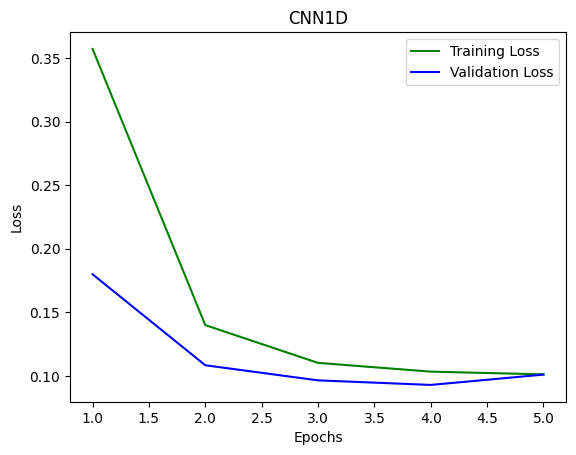

In [31]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

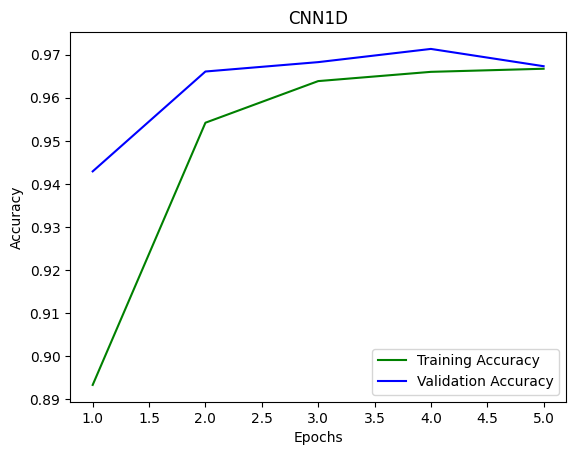

In [32]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 6)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

4949/4949 [==============================] - 65s 13ms/step


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 96.72

Precision: 96.41
Recall: 96.72
F1-score: 96.46



In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

In [36]:
np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       15., 16.])

In [37]:
np.unique(y_pred_classes)

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16])

In [38]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.98      0.98      0.98     38966
             DDoS       1.00      1.00      1.00     47954
              DoS       0.77      0.94      0.85      1352
MITM ARP Spoofing       0.45      0.18      0.25      2035
            Mirai       0.91      0.95      0.93     18195
           Sparta       0.98      0.97      0.98     16458
            Theft       0.76      0.76      0.76      1251
           Attack       0.86      0.98      0.92      3658
              C&C       0.99      0.69      0.82       195
     FileDownload       0.81      0.98      0.89       200
        HeartBeat       0.90      0.96      0.93       198
            Okiru       0.57      1.00      0.73         4
   Reconnaissance       0.98      0.98      0.98     27627
            Torii       0.35      0.12      0.17        52
            Flood       0.98      0.99      0.99       198

         accuracy                           0.97    15

In [3]:
num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)

category = ['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

NameError: name 'np' is not defined

# CNN 2D 

In [30]:
cnn2d = Sequential()
cnn2d.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(8, 8, 1)))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Flatten())
cnn2d.add(Dense(512, activation='relu'))
cnn2d.add(Dense(units=17, activation='softmax'))

cnn2d.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)

X_val = X_val.reshape(X_val.shape[0],  8, 8, 1)

X_test = X_test.reshape(X_test.shape[0],  8, 8, 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [31]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(475026, 8, 8, 1)
(158343, 8, 8, 1)
(158342, 8, 8, 1)


In [32]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = cnn2d.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(475026, 8, 8, 1)
Epoch 1/5
14845/14845 [==============================] - 1438s 97ms/step - loss: 0.3337 - accuracy: 0.8995 - val_loss: 0.2054 - val_accuracy: 0.9361
Epoch 2/5
14845/14845 [==============================] - 1349s 91ms/step - loss: 0.2147 - accuracy: 0.9320 - val_loss: 0.1741 - val_accuracy: 0.9419
Epoch 3/5
14845/14845 [==============================] - 1396s 94ms/step - loss: 0.1844 - accuracy: 0.9404 - val_loss: 0.2290 - val_accuracy: 0.9367
Epoch 4/5
14845/14845 [==============================] - 1345s 91ms/step - loss: 0.1614 - accuracy: 0.9474 - val_loss: 0.1391 - val_accuracy: 0.9498
Epoch 5/5
14845/14845 [==============================] - 1348s 91ms/step - loss: 0.1450 - accuracy: 0.9524 - val_loss: 0.1277 - val_accuracy: 0.9593


In [33]:
cnn2d.save('CNN2D_iot_300mb.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


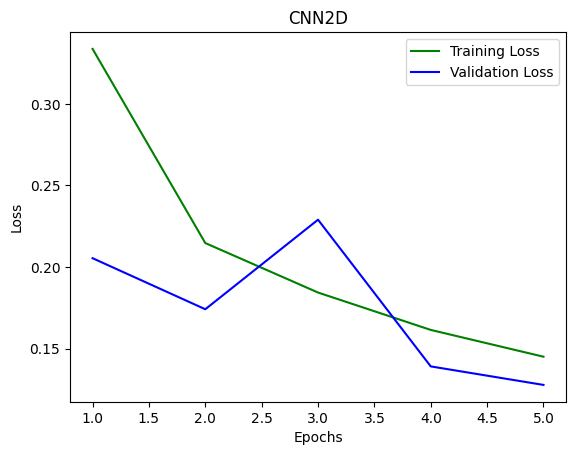

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 6)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

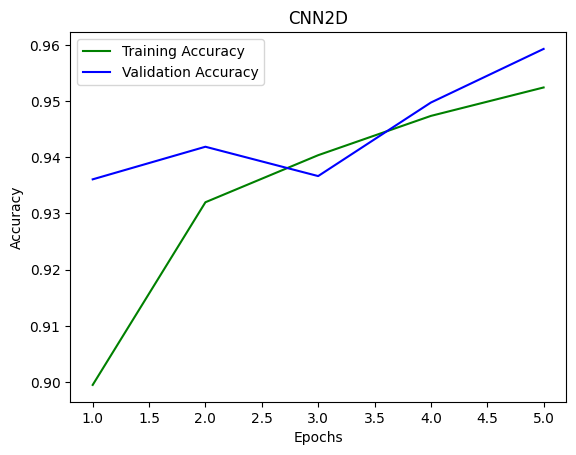

In [35]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 6)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [37]:
y_pred = cnn2d.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

4949/4949 [==============================] - 59s 12ms/step


In [38]:
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 95.97

Precision: 95.48
Recall: 95.97
F1-score: 95.50



In [39]:
np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       15., 16.])

In [40]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.98      0.98      0.98     38966
             DDoS       1.00      1.00      1.00     47954
              DoS       0.68      0.65      0.67      1352
MITM ARP Spoofing       0.44      0.06      0.10      2035
            Mirai       0.88      0.98      0.93     18195
           Sparta       0.97      0.97      0.97     16458
            Theft       0.75      0.68      0.71      1251
           Attack       0.86      0.94      0.90      3658
              C&C       0.97      0.56      0.71       195
     FileDownload       0.78      0.98      0.87       200
        HeartBeat       0.83      0.95      0.89       198
            Okiru       0.40      1.00      0.57         4
   Reconnaissance       0.96      0.96      0.96     27627
            Torii       0.31      0.15      0.21        52
            Flood       1.00      0.98      0.99       198

         accuracy                           0.96    15

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)

category = ['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.988632,37995.0,118548.0,829.0,971.0
1,DDoS,0.998150,47721.0,110329.0,60.0,233.0
2,DoS,0.994405,882.0,156575.0,416.0,470.0
3,MITM ARP Spoofing,0.986933,119.0,156155.0,153.0,1916.0
4,Mirai,0.982607,17762.0,137827.0,2321.0,433.0
5,Sparta,0.993438,15983.0,141321.0,564.0,475.0
6,Theft,0.995680,851.0,156808.0,284.0,400.0
7,Attack,0.995042,3431.0,154127.0,558.0,227.0
8,C&C,0.999444,110.0,158145.0,3.0,85.0
9,FileDownload,0.999634,196.0,158089.0,54.0,4.0
